<p style="text-align:center">
PSY 341K <b>Python Coding for Psychological Sciences</b>, Fall 2019

<img src="https://github.com/sathayas/JupyterPythonFall2019/blob/master/Images/PythonLogo.png?raw=true" alt="Python logo" width="400">
</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Clustering </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 12 - 14, 2019 </b></p>

<hr style='height:5px;border:none' />

# 0. What is machine learning?
<hr style="height:1px;border:none" />

The main goal of **machine learning** is to build (*or to* ***learn***) a predictive model based on available data. Although machine learning is built upon statistical concept, it is different from traditional statistics, where inference and estimation are performed based on known statistical distributions. 

Machine learning is a data-driven approach. Some machine learning methods may work well for some data, but may not work well for other types of data. There is no machine learning method that works well for any data. People usually have to choose a machine learning method that works well for their data (often via trails and errors).

## Supervised v.s. unsupervised learning

In machine learning, a data set consists of **features**, or variables used to make predictions. A data set may also contain the **labels**, the true group assignments or classes. The goal of **supervised learning** is to train a model to predict labels based on the available features. **Classification**, or assignment of observations into distinct categories, is a popular example of supervised learning. 

Supervised learning models are often constructed -- *learned or* ***trained*** -- using a portion of a data set, known as the **training data**. The resulting model is validated using the remaining portion of the data set known as the **testing data**. This framework is necessary to avoid **overfitting**, where the model can predict the training data very accurately but unable to predict on new data sets.

Unlike supervised learning, true labels may not be available for **unsupervised learning**. The goal of unsupervised learning is to find patterns in the data (often without labels). **Clustering**, or finding natural grouping of observations with similar features, is one example of unsupervised learning. **Dimension reduction** (not covered in this class), or describing a large number of features with a small number of summary features, is another 

## Glossary of machine learning

Just FYI, there is a glossary of machine learning terms available from Google's [machine learning tutorial](https://developers.google.com/machine-learning/glossary). 


# 1. Simple clustering example
<hr style="height:1px;border:none" />

Now let's take a look at a simple example of clustering. The goal of clustering is to identify grouping of observations based on similarities in features.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in **Scikit-learn** (or **`sklearn`**, a popular machine learning library in Python). The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterPythonFall2019/blob/master/Images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. 

[`<IrisCluster.py>`](https://github.com/sathayas/PythonClassFall2019/blob/master/clusterExamples/IrisCluster.py)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


In [5]:
%matplotlib inline

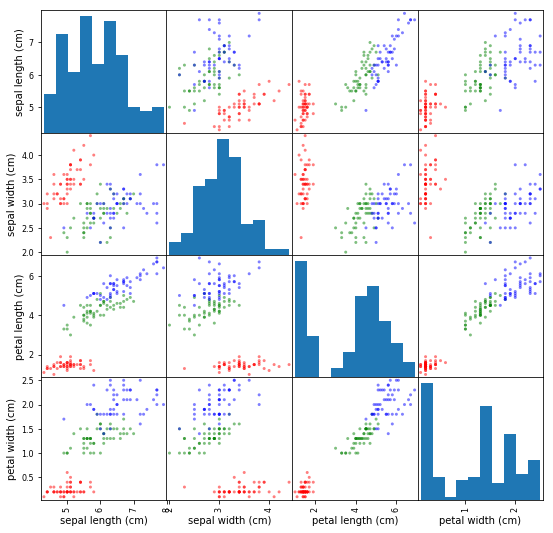

In [6]:
# combining features as a dataframe
featureData = pd.DataFrame(X, columns=varNames)

# creating a list of colors
yColor = []
colorVector = 'rgb'
for iClass in range(3):
    yColor = yColor + ([colorVector[iClass]] * len(y[y==iClass]))

# plotting the scatter plot matrix
pd.plotting.scatter_matrix(featureData, figsize=[9,9], color=yColor)
plt.show()


## Clustering
For this example, we use the **K-means clustering** method. The K-means clustering splits the data into **K** clusters of similar sizes. This algorithm starts by choosing **K** centroids in the feature space, defining the centers of **K** clusters. Then it assigns each observation to a cluster by minimizing the distance between the observation and a centroid. 

K-means clustering is available in **`sklearn.cluster`** as a transformation object **`KMeans`**. Here, the number of clusters **`n_clusters`** is a *required* parameter. We can use the **`.fit()`** method to fit the data, and cluster assignments can be found as the attribute **`.labels_`**. The coordinates for the centroids can be found as the attribute **`.cluster_centers_`**. 

In [8]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

Now, let's see how well the K-means algorithm worked.

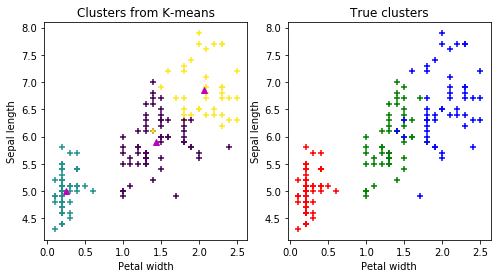

In [15]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'m^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=yColor,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()


The red triangles indicate the centroids.

# 2. Example: seed data
<hr style="height:1px;border:none" />

## Data
The data set [**`seeds_dataset.txt`**](https://github.com/sathayas/PythonClassFall2019/blob/master/clusterExamples/seeds_dataset.txt) contains 210 observations with 7 features of wheat kernels. The features are

  1. area
  2. perimeter
  3. compactness
  4. length of kernel
  5. width of kernel
  6. asymmetry coefficient
  7. length of kernel groove

There are three kinds of wheat kernels (N=70 each), indicated by the 8th column of the data (1=Kama, 2=Rosa and 3=Canadian). 

<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;">Source: UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/seeds </p>

Here is a code snippet to load the data set.

[`<SeedCluster.py>`](https://github.com/sathayas/PythonClassFall2019/blob/master/clusterExamples/SeedCluster.py)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# loadin the data
seedData = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seedFeatures = np.array(seedData.iloc[:,:7])
seedTargets = np.array(seedData.iloc[:,7])
targetNames = ['Kama','Rosa','Canadian']

# feature names
featureNames = ['area',
                'perimeter',
                'compactness',
                'length of kernel',
                'width of kernel',
                'asymmetry coefficient',
                'length of kernel groove',
                'class']
seedData.columns = featureNames

Now let's plot the data.

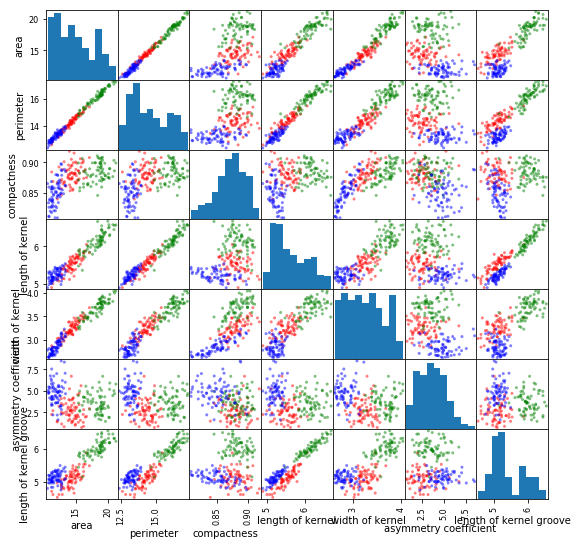

In [19]:
# creating a list of colors
yColor = []
colorVector = 'rgb'
for iClass in range(1,4):
    yColor = yColor + ([colorVector[iClass-1]] * len(seedTargets[seedTargets==iClass]))

# plotting the scatter plot matrix
pd.plotting.scatter_matrix(seedData.iloc[:,:7], figsize=[9,9], color=yColor)
plt.show()

## Clustering

### Exercise

**Clustering seed data**. Perform K-means clustering on the features from the seed data. Then extract the resulting cluster labels to a list **`y_clus`**.

## Results

Now let's plot two of the features against each other. On the left panel, clusters generated by the K-means clustering are plotted in different colors. On the right panel, the true clusters are plotted in different colors.

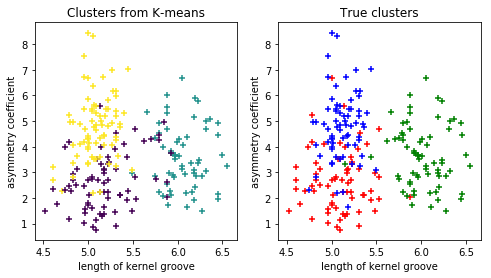

In [20]:

### plotting the clusters
plt.figure(figsize=[8,4])
xFeature = 6
yFeature = 5
# First, results from K-means
plt.subplot(121)
plt.scatter(seedFeatures[:,xFeature],
            seedFeatures[:,yFeature], c=y_clus, marker='+')
plt.xlabel(featureNames[xFeature])
plt.ylabel(featureNames[yFeature])
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(seedFeatures[:,xFeature],
            seedFeatures[:,yFeature], c=yColor, marker='+')
plt.xlabel(featureNames[xFeature])
plt.ylabel(featureNames[yFeature])
plt.title('True clusters')

plt.show()


# 3. Evaluating clustering performance
<hr style="height:1px;border:none" />

In a rare circumstance in which you happen to have the information for the true clusters, then you can evaluate how accurate / inaccurate your clustering algorithm results are. A challenge here is that clusters may not be labeled the same in the target and clustering algorithm outcomes. For example, the *Setosa* cluster may be labeled with 0s in the target, but it may be labeled with 1s in the clustering algorithm results. Luckily, there are a number of metrics that can still evaluate the performance of clustering despite the difference in cluster labels. Here are two of those:

  * **Adjusted Rand index (ARI)**:
      * It summarizes the similarity between the cluster labels. 
      * Range: [-1, 1]. 
          * A negative ARI indicates a very bad match (independent labelings). 
          * An ARI close to 1 indicates highly similar clusters. 
          * ARI=1 indicates the perfect match.
  * **Adjusted mutual information (AMI)**:
      * It summarizes the agreement between the cluster labels. 
      * Range: [0, 1]. 
          * An AMI close to 0 indicates a very bad match (independent labelings). 
          * An AMI close to 1 indicates highly similar clusters. 
          * AMI=1 indicates the perfect match.

## Example
Let's compare the iris clustering results (without and with normalization) to the true cluster labels.

[`<ClusterEvalMetrics.py>`](https://github.com/sathayas/PythonClassFall2019/blob/master/clusterExamples/ClusterEvalMetrics.py)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features



# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means

Now ARI & AMI.

In [22]:
# ARI  &  AMI
print('ARI =  %7.4f' % adjusted_rand_score(y, y_clus))
print('AMI =  %7.4f' % adjusted_mutual_info_score(y, y_clus))

ARI =   0.7302
AMI =   0.7484


/usr/lib64/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Exercise

**ARI and AMI of seed data clustering**. Calculate the ARI and AMI of the clustering results you generated earlier on the seed data.

# 4. Number of clusters
<hr style="height:1px;border:none" />

Many clustering methods often requires the number of clusters as the required parameter. However, *we don't always know how many clusters are in our data.* If we don't know the number of clusters, then we estimate the number of clusters from the data before clustering.

## Data
The data set for this example, **`wiscsem.txt`** consists of the Weschler Intelligence Scale for Children (WISC) of 175 children. There are 11 features in this data set.

 * `info`: Information
 * `comp`: Comprehension
 * `arith`: Arithmetic
 * `simil`: Similarities
 * `vocab`: Vocabulary
 * `digit`: Digit Span
 * `pictcomp`: Picture Completion
 * `parang`: Paragraph Arrangement
 * `block`: Block Design
 * `object`: Object Assembly
 * `coding`: Coding
 
<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;"> 
Source: Tabachnick & Fidell, <i>Using Multivariate Statistics</i>, 6th Ed. Pearson. <a href='http://media.pearsoncmg.com/ab/ab_tabachnick_multistats_6/datafiles/ASCII/wiscsem.dat'> Link to the original data</a> </p>

We are interested in seeing if there are any clusters of children with similar WISC outcomes. 

To do so, let's load the data first.

[`<WiscCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/WiscCluster.py)

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# loadin the data
wiscData = pd.read_csv(os.path.join('DataML','wiscsem.txt'), sep='\t')
wiscFeatures = np.array(wiscData.iloc[:,2:13])
featureNames = np.array(wiscData.columns[2:13])

## Scree plot
One way we can determine the number of clusters is to plot the *sum of squared distances from cluster centroids (i.e., how far observations are from the centrolids)*, also known as the **inertia**. We can get the inertia by the attribute **`.inertia_`** of the clustering object. 

We run the K-means algorithm with different numbers of clusters, and calculate the corresponding inertiae. Then we plot the inertiae against the number of clusters. The inertia decreases as the number of clusters increases. However, there is an *elbow* in this plot where the rate of decrease slows down. The elbow is the point of compromise; adding more clusters does not decrease the inertia dramatically. Just FYI, this type of plot is known as a **scree plot**. It is commonly used in multivariate statistics and machine learning to determine the number of variables / factors / features to be used in an analysis. 

In this particular example, we calculate the inertia up to 20 clusters.

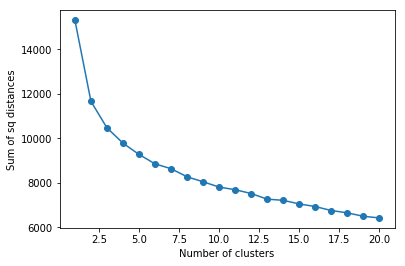

In [33]:
# determinging the number of clusters (up to 20 clusters)
SSE = []
for iClus in range(1,21):
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(wiscFeatures)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,21),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()

The selection of the elbow location is somewhat subjective. In this example, 3 clusters seem reasonable for this data set. So we will re-run K-means with 3 clusters.

## Clustering and results

In [34]:
## We will go with 3 clusters
# K-means clustering again
km = KMeans(n_clusters=3)
km.fit(wiscFeatures)  # fitting the principal components
y_clus = km.labels_   # clustering info resulting from K-means

Let's examine the resulting clusters by plotting some of the features with the cluster information.

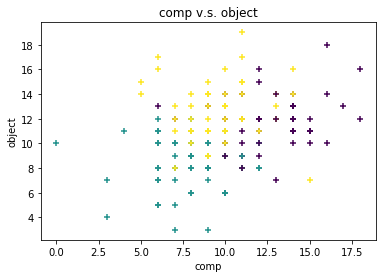

In [48]:
### plotting the clusters
# with two of the features
xFeature = 1 # index for the feature on the x-axis
yFeature = 9 # index for the feature on the y-axis
plt.scatter(wiscFeatures[:,xFeature],
            wiscFeatures[:,yFeature],c=y_clus,marker='+')
plt.xlabel(featureNames[xFeature])
plt.ylabel(featureNames[yFeature])
plt.title(featureNames[xFeature] + ' v.s. ' + featureNames[yFeature])
plt.show()
